### 1) Loading the Dataset

In [1]:
import pandas as pd
df=pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### 2) Data cleaning & Formating

In [3]:
df.isnull().sum() # check Null Values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
df['deposit'].value_counts() # check target variable is Balanced or Imbalanced - O/P shown as target variable is Balanced

no     5873
yes    5289
Name: deposit, dtype: int64

In [5]:
df.shape

(11162, 17)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


### Visualizing the Data

In [7]:
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV

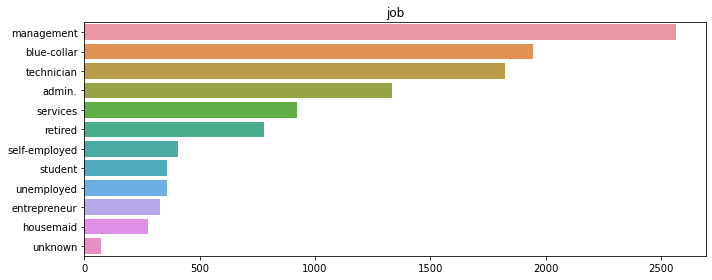

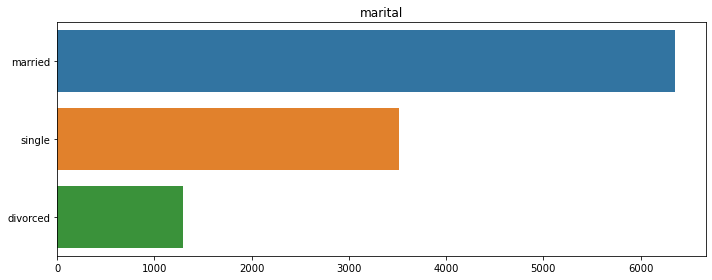

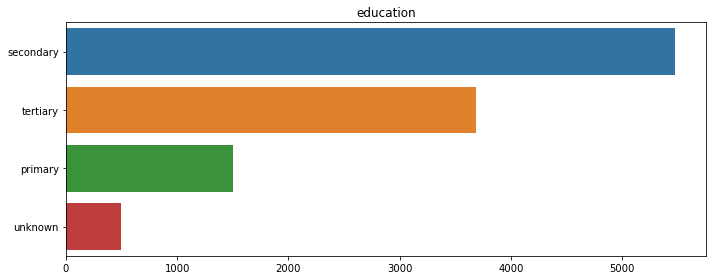

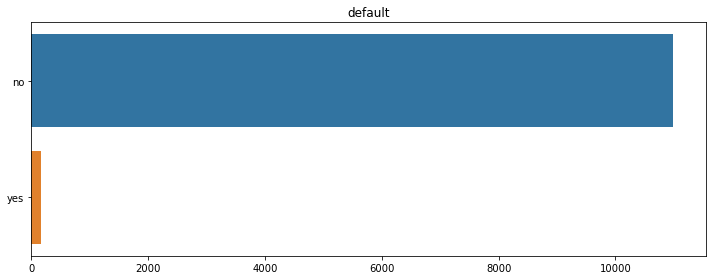

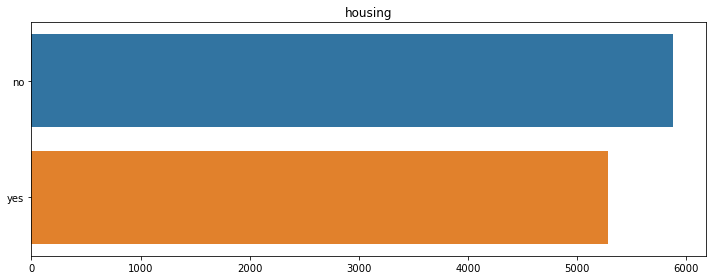

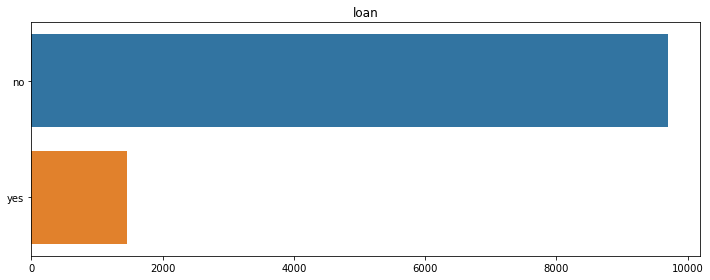

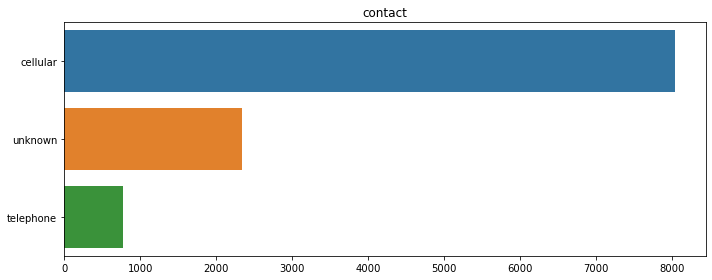

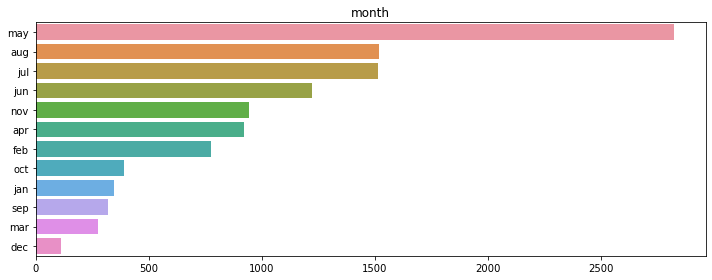

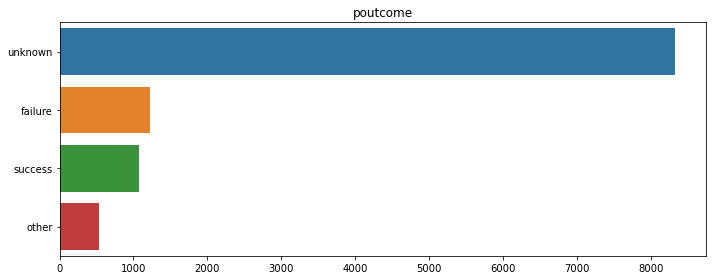

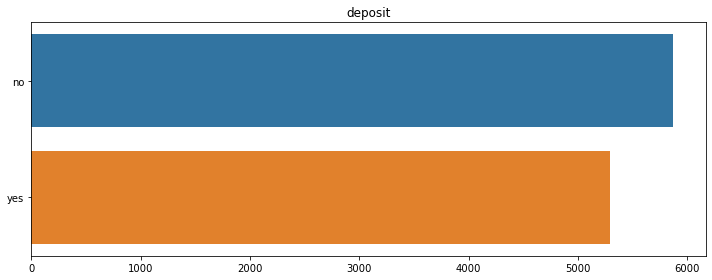

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
categorcial_variables = ['job', 'marital', 'education', 'default','housing', 'loan', 'contact', 'month', 'poutcome','deposit']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [9]:
df.groupby('deposit').mean()

,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
no,40.837391,1280.227141,16.108122,223.130257,2.839264,35.685340,0.528350
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


#### Observations:
The average age of customers who bought the term deposit is higher than that of the customers who didn’t.


In [10]:
df.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.374063,1195.866567,15.340330,347.929535,2.376312,64.338831,0.973763
blue-collar,39.505144,1203.926440,15.235597,394.658951,2.541152,44.061214,0.633230
entrepreneur,42.887195,1621.942073,15.442073,370.182927,2.725610,32.746951,0.536585
housemaid,47.445255,1366.160584,16.364964,348.346715,2.689781,33.540146,0.503650
management,40.218239,1793.663679,15.792284,361.482073,2.588075,54.456352,0.925175
retired,65.424165,2417.250643,15.519280,389.993573,2.131105,53.003856,0.994859
self-employed,39.809877,1865.372840,15.938272,396.155556,2.533333,45.039506,0.804938
services,38.141928,1081.171181,15.728061,385.955580,2.576381,51.546046,0.684724
student,26.102778,1500.783333,15.175000,330.672222,2.169444,68.683333,1.297222


In [11]:
df.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,47.365043,1371.835267,15.689869,392.481825,2.457077,46.651199,0.664346
married,44.533617,1599.927570,15.678791,361.063769,2.621477,49.505432,0.822233
single,33.017339,1457.255259,15.608869,384.195566,2.323195,56.344798,0.913019


In [12]:
df.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,48.220667,1523.031333,15.510667,383.803333,2.646000,39.976667,0.688000
secondary,40.086012,1296.480278,15.568846,373.344960,2.470051,53.302045,0.821768
tertiary,39.513147,1845.869070,15.782597,368.627812,2.487395,53.120629,0.924370
unknown,45.523139,1746.605634,16.160966,346.448692,2.672032,50.585513,0.706237


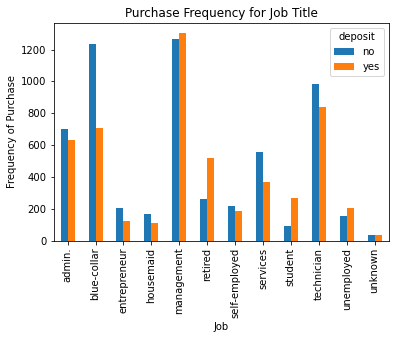

In [13]:
%matplotlib inline
pd.crosstab(df.job,df.deposit).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

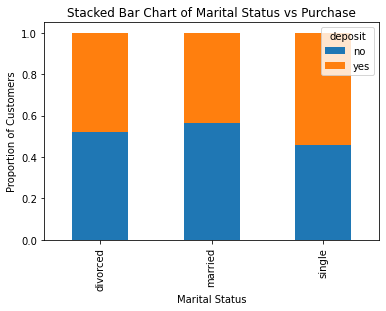

In [14]:
table=pd.crosstab(df.marital,df.deposit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

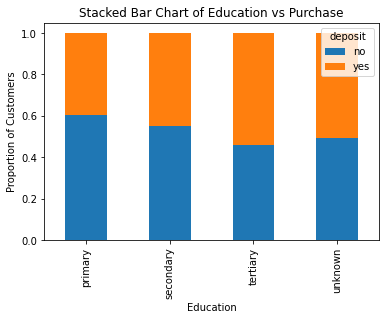

In [15]:
table=pd.crosstab(df.education,df.deposit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

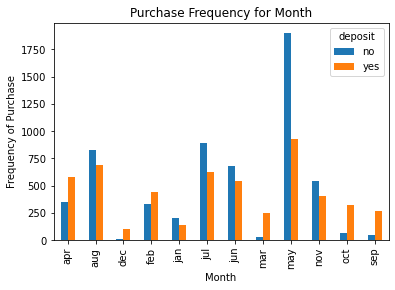

In [16]:
pd.crosstab(df.month,df.deposit).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

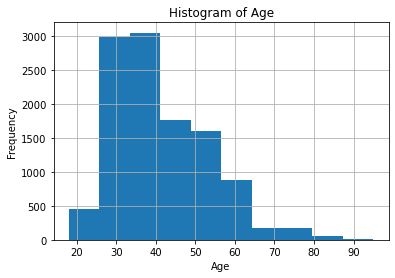

In [17]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Most of the customers of the bank in this dataset are in the age range of 27–40.

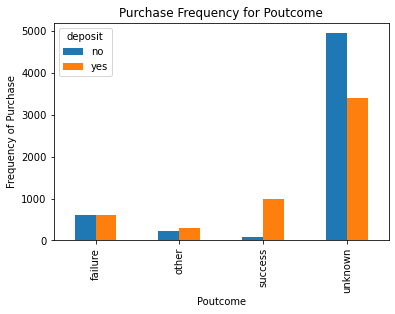

In [18]:
pd.crosstab(df.poutcome,df.deposit).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

### 3) Data Transformation - Encoding Categorical data

In [19]:
#Create dummy variables: That is variables with only two values, zero and one.

cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data=df.join(cat_list)
    df=data
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [20]:
data_final=df[to_keep]
data_final.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'deposit', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [21]:
data_final_vars=data_final.columns.values.tolist()
y=['deposit']
X=[i for i in data_final_vars if i not in y]

### 4) Check Correlation

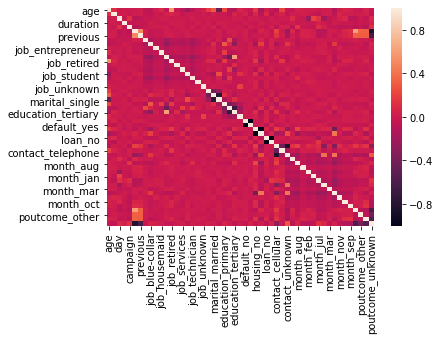

In [22]:
#Check the independence between the independent variables
sns.heatmap(data_final.corr())
plt.show()

### 5) Feature Selection

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features

In [23]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\ABHILASHA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False False False False False False False
  True False False  True False False False False False False False False
 False False False False  True False  True False  True False  True False
  True  True  True  True  True False  True  True  True  True  True False
 False  True  True]
[32 34 31 28 18 33 24 27 26 14  4 15  1 16 20  1 22  6 12 19  5 29 13 25
  8 23 10 21  1  9  1 11  1  7  1 30  1  1  1  1  1 17  1  1  1  1  1  2
  3  1  1]


In [24]:
cols=["previous","job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", 
      "poutcome_failure", "poutcome_success"]
     
X=data_final[cols]
y=data_final['deposit']

In [25]:
X

,previous,job_blue-collar,job_retired,job_services,job_student,default_no,month_aug,month_dec,month_jul,month_nov,month_oct,month_sep,poutcome_failure,poutcome_success
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,0,0,1,0,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,0,0,0,0


### 6) Train & Test Split 

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


### 7) Feature scaling 

In [27]:
from sklearn.preprocessing import StandardScaler  
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)  
X_test= st_x.transform(X_test)  

C:\Users\ABHILASHA\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ABHILASHA\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\ABHILASHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### 8) Model Evaluation & check Accuracy

#### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.66


### Cross Validation
Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. I am using 10-fold Cross-Validation to train Logistic Regression model.

In [29]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.650


The average accuracy remains very close to the Logistic Regression model accuracy; hence, we can conclude that our model generalizes well

In [30]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1605  187]
 [ 964  593]]


In [31]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.62      0.90      0.74      1792
         yes       0.76      0.38      0.51      1557

   micro avg       0.66      0.66      0.66      3349
   macro avg       0.69      0.64      0.62      3349
weighted avg       0.69      0.66      0.63      3349



Interpretation: Of the entire test set, 69% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 66% of the customer’s preferred term deposits that were promoted.

#### Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sn
from sklearn.model_selection import GridSearchCV

In [33]:
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Text(0.5, 15.0, 'Predicted label')

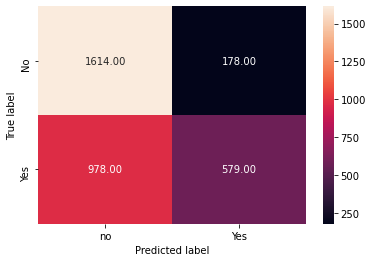

In [34]:
nb_cm = metrics.confusion_matrix( y_test,nb_clf.predict( X_test) )
sn.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [35]:
metrics.accuracy_score( y_test, nb_clf.predict( X_test ) )

0.6548223350253807

#### KNN classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sn
from sklearn.model_selection import GridSearchCV

In [37]:
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11]}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')

In [38]:
knn_clf.fit(X_train, y_train )

knn_clf.best_score_

0.6380391654934084

In [39]:
knn_clf.best_params_

{'n_neighbors': 11}

In [40]:
#Building for the n_neighbors=11
knn_clf = KNeighborsClassifier( n_neighbors =11 )

In [41]:
knn_clf.fit( X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [42]:
knn_cm = metrics.confusion_matrix( y_test, knn_clf.predict( X_test ) )

Text(0.5, 15.0, 'Predicted label')

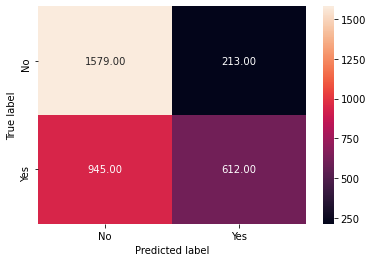

In [43]:
sn.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [44]:
metrics.accuracy_score( y_test, knn_clf.predict( X_test ) )

0.6542251418333831

#### SVM

In [45]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.6631830397133472

#### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)
accuracy_score(y_test, predict)

0.6554195282173784

Compare the accuracy of all model & decide which model gives the better result?

Logistic Regression model(66%) 
Naive Bayes(65.4%)
KNN(63.8%)
SVM (66.31%) 
Random Forest (65.54%)

As per the accuracy of model, Logistic & SVM is more accurate in terms of prediction than others so preferably will use this model for prediction.

